In [188]:
import os.path
from scipy import *
import numpy as np
from numpy import *
from numpy import linalg as LA
import sys as sys
import time
import matplotlib.pyplot as plt

In [189]:
def ColorDefault(k):
    if (k == 0):
        color = '#1f77b4'  # blue
    else:
        if (k % 9 == 0):
            color = '#17becf'  # cyan
        else:
            if (k % 8 == 0):
                color = '#bcbd22'  # sickly greenish tan
            else:
                if (k % 7 == 0):
                    color = '#7f7f7f'  # grey
                else:
                    if (k % 6 == 0):
                        color = '#e377c2'  # pink
                    else:
                        if (k % 5 == 0):
                            color = '#8c564b'  # brown
                        else:
                            if (k % 4 == 0):
                                color = '#9467bd'  # purple
                            else:
                                if (k % 3 == 0):
                                    color = '#d62728'  # red
                                else:
                                    if (k % 2 == 0):
                                        color = '#2ca02c'  # green
                                    else:
                                        color = '#ff7f0e'  # orange
    return color

In [190]:
def DrawLine(xCenter, yCenter, h):
    x = xCenter * np.ones(8)
    y = linspace(yCenter - (h / 2), yCenter + (h / 2), num = 8)
    return (x, y)

In [191]:
def TickPlot(xAxis, yAxis, fig, ax):
    for (xi, yi) in zip(xAxis, yAxis):
        if ((xi == 0) or (xi == 1)):
            h = 0.5
        else:
            h = 0.25
        (xs, ys) = DrawLine(xi, yi, h)
        ax.plot(xs, ys, color = 'k', zorder = 1)
    ax.plot(xAxis, yAxis, color = 'k', zorder = 0)
    plt.xlim([-0.1, 1.25])
    plt.ylim([-2.5, 2.5])
    plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
    plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)
    return

In [192]:
def Averages(nh, x, numPoints, actualX, aveVals):
    cellVals = np.ones(numPoints, float)
    lowIndex = 0
    for k in range(nh):
        highIndex = np.where(actualX <= x[k + 1])[0][::-1][0] + 1
        cellVals[lowIndex:highIndex] = aveVals[k] * cellVals[lowIndex:highIndex]
        plt.plot(actualX[lowIndex:highIndex], cellVals[lowIndex:highIndex], color = ColorDefault(3), zorder = 3)
        lowIndex = highIndex
    return

In [193]:
def MakeWaves(nh, dx):
    x = np.linspace(0, 1, num = nh + 1)
    waveXBasis = np.zeros((nh, nh), float)
    xCell = x[0:nh] + (dx / 2.)
    for k in range(int(nh / 2)):
        waveXBasis[:, (2 * k) + 1] = (1.0 / (2.0 * np.pi * (k + 1) * dx)) * (cos(2 * np.pi * (k + 1) * x[0:nh]) - cos(2 * np.pi * (k + 1) * x[1:nh + 1]))
        if (k == 0):
            waveXBasis[:, 2 * k] = np.ones(nh, float)
        else:
            waveXBasis[:, 2 * k] = (1.0 / (2.0 * np.pi * k * dx)) * (sin(2 * np.pi * k * x[1:nh + 1]) - sin(2 * np.pi * k * x[0:nh]))
    return x, waveXBasis, xCell

In [194]:
def MakeNodeWaves(nh, dx):
    x = np.linspace(0, 1. - (1. / nh), num = nh)
    waveXBasis = np.zeros((nh, nh), float)
    for k in range(int(nh / 2)):
        waveXBasis[:, (2 * k) + 1] = np.sin(2 * np.pi * (k + 1) * x)
        if (k == 0):
            waveXBasis[:, 2 * k] = np.ones(nh, float)
        else:
            waveXBasis[:, 2 * k] = np.cos(2 * np.pi * k * x)
    return x, waveXBasis

In [195]:
def PlotWaves(nh, x, waveXBasis, xNode, waveXBasisNode, plotNode = False, save = False):
    numPoints = 129
    actualX = linspace(0, 1, num = numPoints)
    y = np.zeros(nh + 1, float)
    for k in range(nh):
        fig, ax = plt.subplots(figsize = (5, 2.5))
        ax.set_aspect(aspect = 4)
        ax = plt.axes(frameon = False)
        if (k % 2 == 0):
            fX = np.cos(np.pi * k * actualX)
            if (k == 0):
                plt.text(1.1, 0, r'$\frac{a_{0}}{2}$', fontsize = 20)
            else:
                plt.text(1.1, 0, r'$a_{%d}$' %(k / 2) + 'cos' + r'$%d \pi x$' %(k), fontsize = 20)
        else:
            fX = np.sin(np.pi * (k + 1) * actualX)
            plt.text(1.1, 0, r'$b_{%d}$' %((k / 2) + 1) + 'sin' + r'$%d \pi x$' %(k + 1), fontsize = 20)
        Averages(nh, x, numPoints, actualX, waveXBasis[:, k])
        TickPlot(x, y, fig, ax)
        plt.plot(actualX, fX, color = ColorDefault(0), zorder = 2)
        if (plotNode):
            plt.scatter(xNode, waveXBasisNode[:, k], color = ColorDefault(2), s = 15, zorder = 4)
        if (save):
            fig.savefig(savePath + 'WaveOutputs' + str(nh - k) + '.png', bbox_inches = 'tight', dpi = 600, transparent = True)
        plt.show()
    return

In [196]:
def PlotGeneralWaves(nh, x, xPoints, waves, save = False):
    numPoints = 129
    y = np.zeros(nh + 1, float)
    for k in range(nh):
        fig, ax = plt.subplots(figsize = (5, 2.5))
        ax.set_aspect(aspect = 4)
        ax = plt.axes(frameon = False)
        if (k % 2 == 0):
            if (k == 0):
                plt.text(1.1, 0, r'$\frac{a_{0}}{2}$', fontsize = 20)
            else:
                plt.text(1.1, 0, r'$a_{%d}$' %(k / 2) + 'cos' + r'$%d \pi x$' %(k), fontsize = 20)
        else:
            plt.text(1.1, 0, r'$b_{%d}$' %((k / 2) + 1) + 'sin' + r'$%d \pi x$' %(k + 1), fontsize = 20)
        plt.plot(xPoints, waves[:, k].real, color = ColorDefault(0), zorder = 2)
        plt.plot(xPoints, waves[:, k].imag, color = ColorDefault(3), zorder = 3)
        TickPlot(x, y, fig, ax)
        if (save):
            fig.savefig(savePath + 'WaveOutputs' + str(nh - k) + '.png', bbox_inches = 'tight', dpi = 600, transparent = True)
        plt.show()
    return

In [197]:
savePath = '/Users/sashacurcic/SashasDirectory/ANAG/Figures/'
nh = 16

In [198]:
check = nh
while (check % 2 == 0):
    check = check / 2
if (check != 1):
    sys.exit('ERROR:\nnh must be a base-2 integer!')

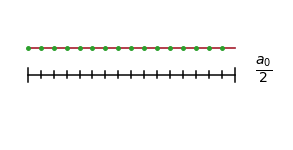

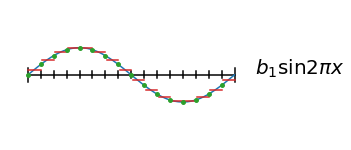

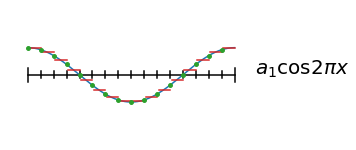

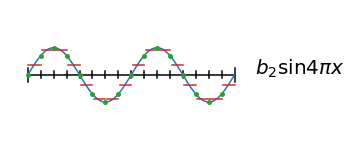

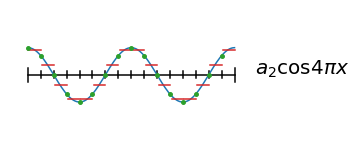

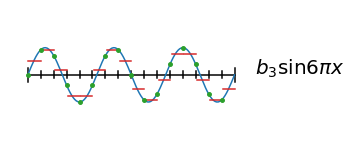

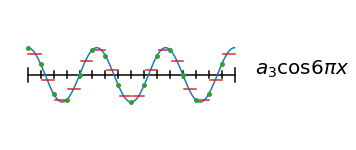

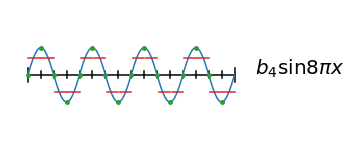

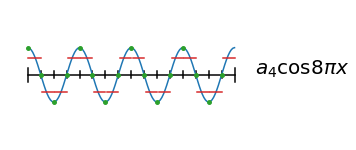

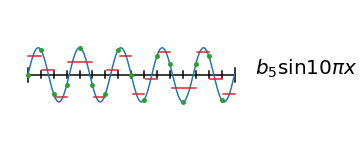

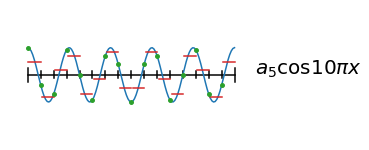

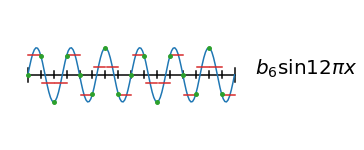

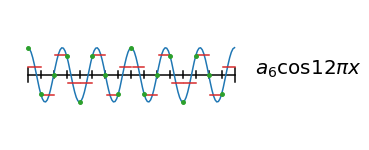

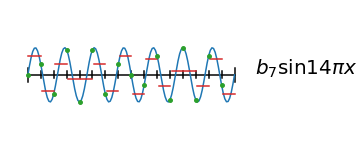

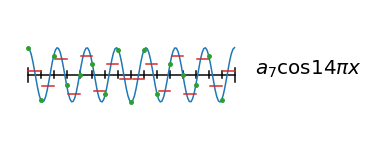

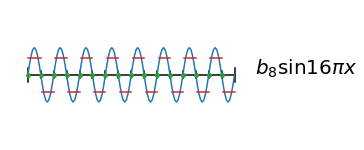

In [199]:
dx = 1. / nh
x, waveXBasis, xCell = MakeWaves(nh, dx)
xNode, waveXBasisNode = MakeNodeWaves(nh, dx)
PlotWaves(nh, x, waveXBasis, xNode, waveXBasisNode, plotNode = True)

In [200]:
cellFFT = dx * np.fft.fft(waveXBasis)
nodeFFT = dx * np.fft.fft(waveXBasisNode)
print(cellFFT)

[[ 6.06129748e-01+0.j         -1.71934626e-02-0.04562658j
   2.06316168e-02-0.01043055j  2.68837942e-02+0.00358873j
   2.92869538e-02+0.01554866j  3.10043467e-02+0.03011767j
   3.38931354e-02+0.054769j    5.01503787e-02+0.13095508j
   4.45567258e-02+0.j          5.01503787e-02-0.13095508j
   3.38931354e-02-0.054769j    3.10043467e-02-0.03011767j
   2.92869538e-02-0.01554866j  2.68837942e-02-0.00358873j
   2.06316168e-02+0.01043055j -1.71934626e-02+0.04562658j]
 [ 6.72488715e-02+0.j          1.07329568e-01-0.34789293j
   3.51977452e-02-0.07955917j  3.56138693e-02-0.04484563j
   3.72969595e-02-0.02804637j  4.13001263e-02-0.01680716j
   5.41742072e-02-0.00756766j  2.24911379e-01-0.045494j
  -1.38896582e-01+0.j          2.24911379e-01+0.045494j
   5.41742072e-02+0.00756766j  4.13001263e-02+0.01680716j
   3.72969595e-02+0.02804637j  3.56138693e-02+0.04484563j
   3.51977452e-02+0.07955917j  1.07329568e-01+0.34789293j]
 [ 1.42289704e-01+0.j          3.89464918e-01+0.05237774j
  -5.16413835e-0

In [201]:
print(nodeFFT)

[[ 5.00000000e-01+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   5.00000000e-01+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 3.76708718e-01+0.00000000e+00j -3.94366446e-02-2.46096830e-01j
   4.41941738e-02-8.59553387e-02j  5.68881117e-02-4.06448909e-02j
   6.25000000e-02-1.24320230e-02j  6.81118883e-02+1.35482970e-02j
   8.08058262e-02+4.93436863e-02j  1.64436645e-01+1.61649749e-01j
  -2.51708718e-01+0.00000000e+00j  1.64436645e-01-1.61649749e-01j
   8.08058262e-02-4.93436863e-02j  6.81118883e-02-1.35482970e-02j
   6.25000000e-02+1.24320230e-02j  5.68881117e-02+4.06448909e-02j
   4.4194

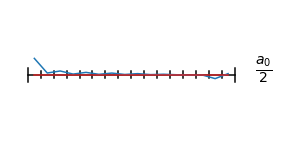

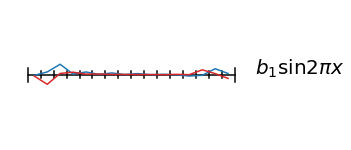

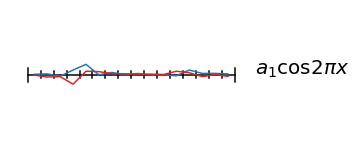

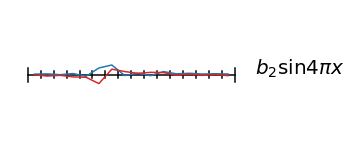

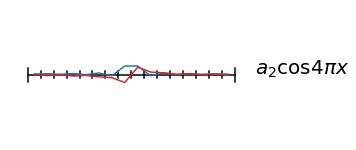

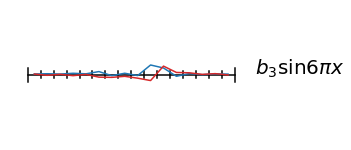

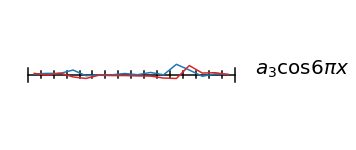

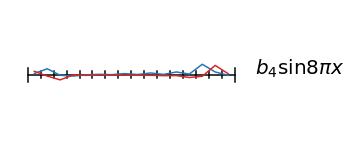

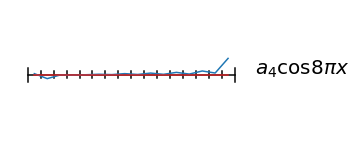

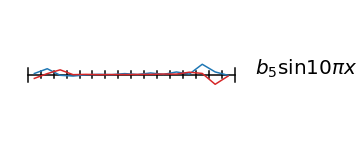

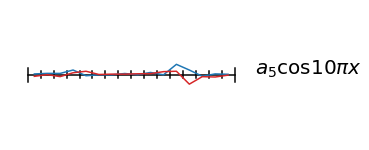

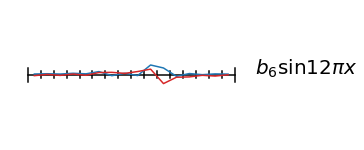

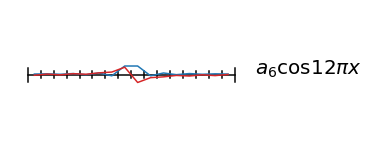

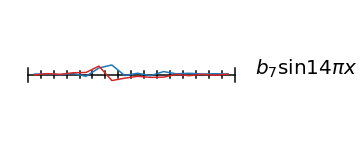

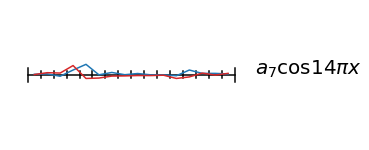

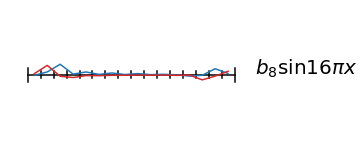

In [202]:
PlotGeneralWaves(nh, x, xCell, cellFFT)

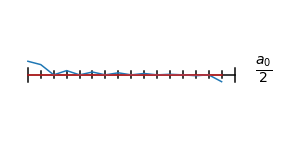

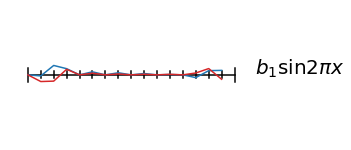

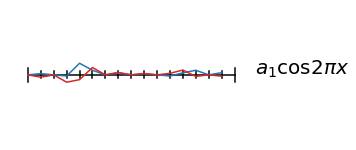

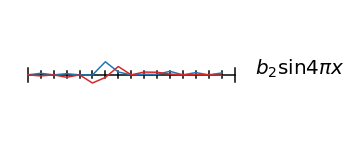

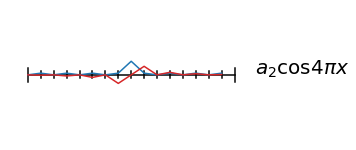

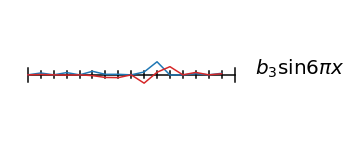

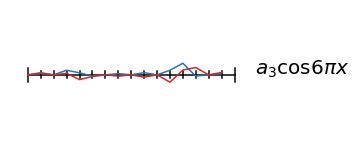

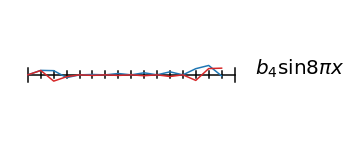

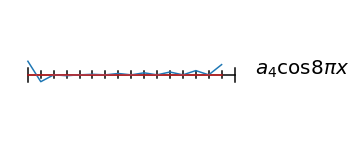

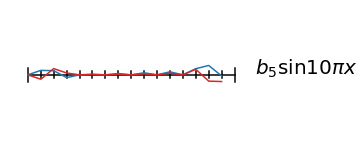

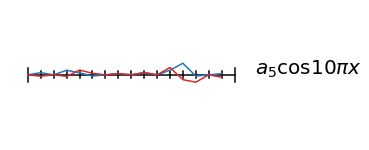

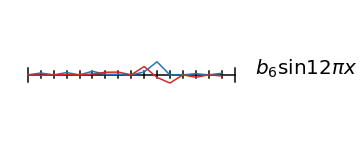

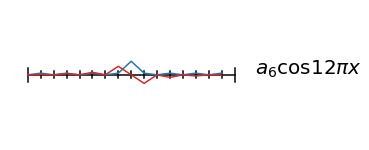

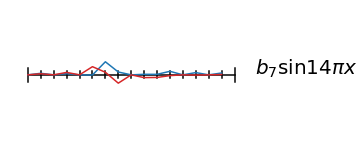

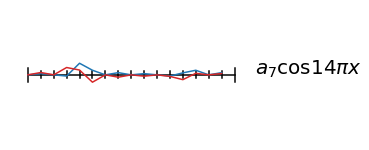

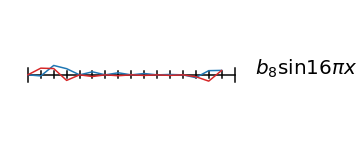

In [203]:
PlotGeneralWaves(nh, x, xNode, nodeFFT)

In [204]:
points = 16
x = np.linspace(0, 1. - (1./points), num = points)
print(x)
s1 = np.sin(2 * np.pi * x)
print(s1)

[0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5    0.5625
 0.625  0.6875 0.75   0.8125 0.875  0.9375]
[ 0.00000000e+00  3.82683432e-01  7.07106781e-01  9.23879533e-01
  1.00000000e+00  9.23879533e-01  7.07106781e-01  3.82683432e-01
  1.22464680e-16 -3.82683432e-01 -7.07106781e-01 -9.23879533e-01
 -1.00000000e+00 -9.23879533e-01 -7.07106781e-01 -3.82683432e-01]


In [205]:
s1fft = np.fft.fft(s1)
print(s1fft)

[-9.95799250e-17+0.00000000e+00j -1.26550410e-15-8.00000000e+00j
 -4.27067681e-16-6.60554663e-16j  1.91553812e-16-9.81427688e-16j
  2.33486982e-16-5.55111512e-16j  1.91553812e-16-9.32492680e-17j
  6.71997040e-16-4.38510058e-16j  3.92537761e-16+0.00000000e+00j
  1.22464680e-16+0.00000000e+00j  3.92537761e-16-0.00000000e+00j
  6.71997040e-16+4.38510058e-16j  1.91553812e-16+9.32492680e-17j
  2.33486982e-16+5.55111512e-16j  1.91553812e-16+9.81427688e-16j
 -4.27067681e-16+6.60554663e-16j -1.26550410e-15+8.00000000e+00j]


In [206]:
s1fft = np.round(s1fft)

In [207]:
s1fftshift = np.fft.fftshift(s1fft)

In [208]:
s1fftshift = (1. / points) * np.round(s1fftshift)
print(s1fftshift)

[ 0.+0.j   0.+0.j   0.+0.j   0.+0.j   0.+0.j   0.+0.j  -0.+0.j  -0.+0.5j
 -0.+0.j   0.-0.5j  0.-0.j   0.+0.j   0.+0.j   0.+0.j   0.+0.j   0.+0.j ]


In [209]:
c1 = np.cos(2 * np.pi * x)
print(c1)
print('')
c1fft = np.fft.fft(c1)
c1fftshift = np.fft.fftshift(c1fft)
c1fftshift = (1. / points) * np.round(c1fftshift)
print(c1fftshift)

[ 1.00000000e+00  9.23879533e-01  7.07106781e-01  3.82683432e-01
  6.12323400e-17 -3.82683432e-01 -7.07106781e-01 -9.23879533e-01
 -1.00000000e+00 -9.23879533e-01 -7.07106781e-01 -3.82683432e-01
 -1.83697020e-16  3.82683432e-01  7.07106781e-01  9.23879533e-01]

[ 0. +0.j  0. +0.j  0. +0.j  0. +0.j -0. +0.j -0. +0.j  0. +0.j  0.5+0.j
 -0. +0.j  0.5+0.j  0. +0.j  0. -0.j  0. -0.j  0. +0.j  0. +0.j  0. +0.j]
